# Tutorial 5 - Sensitivity kernels for gravitational potential coefficients. 

In this tutorial we show how sensitivity kernels for gravitational potential coefficients. This is again done through solution of an appropriate generalised fingerprint problem to determine the necessary adjoint sea level change. The non-zero force terms in this case are:
$$
\zeta_{\phi}^{\dagger} = -\frac{g}{b^2}Y_{lm}, \quad 
\Delta \mathbf{l}^{\dagger}= \int_{\partial M}  \mathbf{x}\times(\Omega \times \mathbf{x}) \zeta_{\phi}^{\dagger} \,\mathrm{d} S, 
$$ 
where $g$ is the surface gravitational acceleration, $b$ the radius of the earth model, and $Y_{lm}$ is the fully normalised real spherical harmonic coefficient of the desired degree and order. The expression for the adjoint angular momentum change arises through a need to decouple the gravitational and centrifugal potential changes within the generalised reciprocity theorem. Because evaluation of such integrals is common, a method ```adjoint_angular_momentum_change_from_adjoint_gravitational_potential_load```
for doing this is provided within the ```FingerPrint``` class. This method is used internally by the method ```adjoint_loads_for_gravitational_potential_coefficient```
called within the code below. 

As ever, we first check that the sensitivity kernels provide the correct values when integrated against the appropriate load, and then plot the kernel with respect to ice thickness projected onto the ice sheets.

observed coefficient =  2.03508480
predicted coefficient =  2.03508621
relative error = 6.968902259634311e-07


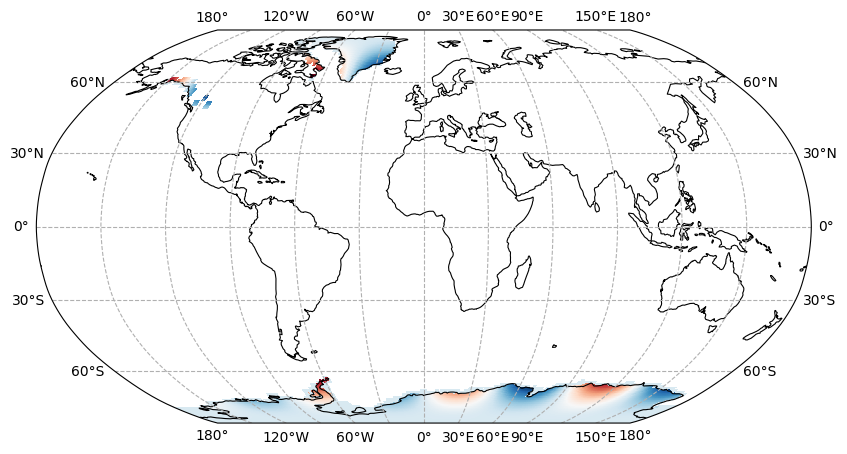

In [1]:
# Import necessary modules for this notebook. 
import numpy as np
import matplotlib.pyplot as plt
import pyslfp as sl

# Set up the FingerPrint instance -- use a higher truncation to aid with plotting. 
fingerprint = sl.FingerPrint()

# Set the initial sea level and ice thickness.
fingerprint.set_state_from_ice_ng()

# Set the direct load
direct_load = fingerprint.southern_hemisphere_load()

# Solve the forward problem
_, _, gravity_potential_change, angular_velocity_change = fingerprint(
    direct_load=direct_load, rtol=1e-9
)

# Get the gravitational potential change.
gravitational_potential_change = (
    fingerprint.gravity_potential_change_to_gravitational_potential_change(
        gravity_potential_change, angular_velocity_change
    )
)

# set the observation degree and order
l = 10
m = -4


# Print the coefficient.
observed_coefficient = fingerprint.coefficient_evaluation(
    gravitational_potential_change, l, m
)
print(f'observed coefficient =  {observed_coefficient:.8f}')


# Get the adjoint load.
_, _, adjoint_gravitational_potential_load, adjoint_angular_momentum_change = (
    fingerprint.adjoint_loads_for_gravitational_potential_coefficient(l, m)
)

# Solve the adjoint problem.
adjoint_sea_level_change, _, _, _ = fingerprint(
    gravitational_potential_load=adjoint_gravitational_potential_load,
    angular_momentum_change=adjoint_angular_momentum_change,
)

predicted_coefficient = fingerprint.integrate(adjoint_sea_level_change * direct_load)
print(f'predicted coefficient =  {predicted_coefficient:.8f}')

print(
    f"relative error = {np.abs(observed_coefficient-predicted_coefficient)/ np.abs(observed_coefficient)}"
)

# Plot the corresponding ice thickness kernel
kernel = fingerprint.direct_load_from_ice_thickness_change(adjoint_sea_level_change)
sl.plot(kernel * fingerprint.ice_projection())

plt.show()
